# Phase 3 Code Challenge Review

Made using resources from the Seattle team - thanks y'all.

## Overview

* Gradient Descent
* Logistic Regression
* Classification Metrics
* Decision Trees

In [12]:
# Imports
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import roc_auc_score, plot_roc_curve
from sklearn.tree import export_graphviz
# import graphviz

In [13]:
import warnings
warnings.simplefilter(action='ignore',category=FutureWarning)

In [14]:
# from src.call import call_on_students

## Part 1: Gradient Descent

### Set Up

In [15]:
# Grab the data from 'auto-mpg.csv'
mpg_df = pd.read_csv("data/auto-mpg.csv")

In [16]:
# Explore the data
mpg_df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


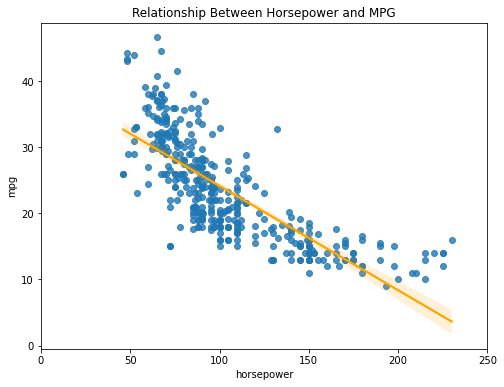

In [17]:
# Let's plot a simple linear regression line using just the horsepower column
plt.figure(figsize=(8, 6))
sns.regplot(x='horsepower', y='mpg', data=mpg_df, line_kws={"color":"orange"})
plt.title('Relationship Between Horsepower and MPG')
plt.xlim(0, 250)
plt.show()

The above graph shows an approximate best fit line for the relationship between `horsepower` and `mpg` in our data.


### 1) Describe the below chart: What is it showing? What does it tell us?

![Slope-RSS relationship image](images/slope-rss-relationship.png)

In [18]:
# call_on_students(1)

#### Answer: 

- This is a cost function of error and we use gradient decent to minimize it. 


### 2) Imagine that you're starting at a slope towards the top upper left corner. Using Zoom's annotate feature, demonstrate how gradient descent would work 

In [19]:
# call_on_students(1)

You have to draw. Too big of a step size, you miss. Too small, takes too log to get there. 

### 3) What is a step size when talking about gradient descent? How does learning rate regulate step size?

In [20]:
# call_on_students(1)

#### Answer: 

- How big of a step i need to take to get the lowest minima for the cost function. It is the size of your derivative. The more steps you take, the smaller the derivative gets. Learning rate (alpha) * derivative(shrinks)
    - Too big of a step, you miss the low.
    - Too small of a step, you take forever.

- Daniel's answer: Step size is how much you move down the cost function to find minimal error. Step size = alpha, alpha is multiplied with the partial derivative. Learning is the proportion of your partial derivative that you want to step sizes to be. 


## Part 2: Logistic Regression

### 4) Describe a logistic regression model:

- What kind of target is a logistic regression model used for?
- What are the predictions that a logistic regression model outputs?
- How is it different from linear regression?
- Is it a parametric or non-parametric model?

In [21]:
# call_on_students(1)

#### Answer: 

- Logistic regression is for targets that are binary - could be muti class classification.
    - predictions are 0,1 and what not
- The predictions return class, predict_proba returns probability of each class. 
    - 0,1
- Linear Regression is predicting continuous data and data that has a linear relationship.
    - LinReg (loss - RSS) 
    - LogRes (log_loss, sigmoid)
- Parametric
    - able to write equation.


### 5) Compare a logistic regression model to any of the other model types we've learned:

- List one benefit of logistic regression when compared to the other model type
- List one reason the other model type might be more useful

In [22]:
# call_on_students(1)

#### Answer: 

- comparing to decision tree, log reg can give you some sort of equation and probabilities.
- Decision trees won't give you the equations, but it is easier to read.

<br>Daniel's answer:
- Pros
    - Using gradient decent to optimize coefs, by minimizing cost function, as compared to kNN
    - easy to interpret coefs as related to log-odds of targets.
    - not prone to overfitting compared decision trees
- Cons 
    - not robust to class imbalance in target
    - doesn't handle interactions b/w features well
    - prone to underfitting (inherent built in regularization)

## Part 3: Logistic Regression and Classification Metrics with Code

### Set Up

In [23]:
# Let's use the same data, but now with a classification target
mpg_class = pd.read_csv('data/auto-mpg-classification.csv')

In [24]:
# Check this new dataframe out
mpg_class.head()

,cylinders,displacement,horsepower,weight,acceleration,model year,origin,target
0,8,307.0,130,3504,12.0,70,1,0
1,8,350.0,165,3693,11.5,70,1,1
2,8,318.0,150,3436,11.0,70,1,0
3,8,304.0,150,3433,12.0,70,1,1
4,8,302.0,140,3449,10.5,70,1,1


### 6) Prepare our data for modeling:

1. Perform a train/test split
2. Scale the inputs


In [25]:
# call_on_students(1)

In [26]:
X = mpg_class.drop('target', axis=1)
y = mpg_class['target']

In [27]:
# Train-test split
# Set test_size=0.33 and random_state=42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [28]:
# Scale the data
scaler = StandardScaler()

scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

### 7) Explore the `target` column and our model-less baseline

1. What is the breakdown of the `target` column in our training data?
2. What would a model-less baseline look like in this context?
3. How accurate would that model-less understanding be on our test data?

In [29]:
# call_on_students(1)

1. Our target data is 0s and 1s. 
    - 74.4% 0s 
    - 25.5% 1s
2. our baseline will aways predict 0 and will be accurate 74.4% times.
3. On our test data, the baseline will be accurate 75.4% of the times . 

In [31]:
y_train.value_counts(normalize=True)

0    0.744275
1    0.255725
Name: target, dtype: float64

In [32]:
y_test.value_counts(normalize=True)

0    0.753846
1    0.246154
Name: target, dtype: float64

#### Part 1: explore the target column breakdown in train data

In [33]:
# Code to explore
y_train.value_counts(normalize=True)

0    0.744275
1    0.255725
Name: target, dtype: float64

In [34]:
np.bincount(y_train)

array([195,  67])

#### Answer:

- Our target data is 0s and 1s. 
    - 74.4% 0s 
    - 25.5% 1s


#### Part 2: What would a model-less baseline look like in this context?

#### Answer:

- our baseline will aways predict 0 and will be accurate 74.4% times.


#### Part 3: How accurate would that baseline be on test data?


In [20]:
# Code to find the answer
y_test.value_counts(normalize=True)

0    0.753846
1    0.246154
Name: target, dtype: float64

#### Answer:

- On our test data, the baseline will be accurate 75.4% of the times .


### 8) What is one problem you could foresee based on this breakdown, and what is one strategy you could employ to address that problem?

In [ ]:
# call_on_students(1)

#### Answer:

- We see there is a large class imbalance (0s are more than 1s) so we want to either increase the under sampled or reduce the over sampled. Usually we dont want to remove the real data points so we increase the under sampled class using SMOTE. 
- we could also adjust class_weight parameter
- why do you want to undersample majority?
    - losing a lot of data, throwing away 50%+ of data


### 9) Fit a logistic regression model, and plot a confusion matrix of the results on our test set

In [35]:
# call_on_students(1)

In [37]:
# Fit a logistic regression model
# Name the model `logreg` and set random_state = 42
logreg = LogisticRegression(random_state=42)
logreg.fit(X_train_scaled, y_train) # scaled because logreg is distance based

LogisticRegression(random_state=42)

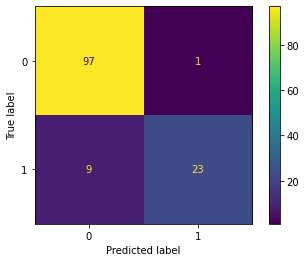

In [38]:
# Plot a confusion matrix on the test data
plot_confusion_matrix(logreg, X_test_scaled, y_test);

### 10) Calculate the accuracy, precision, recall and f1-score for the test set

You can use the confusion matrix above, or sklearn functions

In [ ]:
# call_on_students(1)

In [23]:
tp = 23
tn = 97
fp = 1
fn = 9

In [24]:
y_preds = logreg.predict(X_test_scaled)

In [26]:
# Accuracy
# In multilabel classification, this function computes subset accuracy: 
# the set of labels predicted for a sample must exactly match the corresponding set of labels in y_true.
accuracy_score(y_test, y_preds)

# accuracy = (tp + tn) / (tp + tn + fp + fn)
# accuracy

0.9230769230769231

In [29]:
# Precision
# The precision is the ratio tp / (tp + fp) where tp is the number of true positives and fp the number of false positives. 
# The precision is intuitively the ability of the classifier not to label as positive a sample that is negative.
precision_score(y_test, y_preds)

# precision = tp / (tp + fp)
# precision

0.9583333333333334

In [32]:
# Recall
# The recall is the ratio tp / (tp + fn) where tp is the number of true positives and fn the number of false negatives. 
# The recall is intuitively the ability of the classifier to find all the positive samples.
# The best value is 1 and the worst value is 0.
recall_score(y_test, y_preds)

# recall = tp / (tp + fn)
# recall

0.71875

In [36]:
# F1-Score
# The F1 score can be interpreted as a harmonic mean of the precision and recall, 
# where an F1 score reaches its best value at 1 and worst score at 0. 
# The relative contribution of precision and recall to the F1 score are equal. The formula for the F1 score is:
# F1 = 2 * (precision * recall) / (precision + recall)

f1_score(y_test, y_preds)

# f1 = 2 * (precision * recall) / (precision + recall)
# f1

0.8214285714285714

### 11) Calculate the ROC-AUC on the test set, and plot the ROC curve

For this you'll definitely want to use the sklearn functions!

In [ ]:
# call_on_students(1)

In [40]:
# Calculate roc-auc
y_prob = logreg.predict_proba(X_test_scaled)

y_hat_bc = y_prob[:, 1]

roc_auc_score(y_test, y_hat_bc)

0.9811862244897959

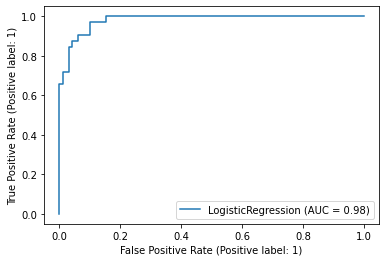

In [41]:
# Plot the ROC curve
plot_roc_curve(logreg, X_test_scaled, y_test);

### 12) Evaluate! Based on the metrics of our test data, how is our model doing?

In [ ]:
# call_on_students(1)

#### Answer:

- The model is preforming good, the score is closer to 1!
<br><br>
Daniel's answers:
- Better than the baseline accuracy
- recall is low (we missed a lot of values that were actually 1s - we have false negatives)

## Part 4: Decision Trees

### Set Up

NOTE! This code might not work for you! The images these generate are already prepopulated below because of that.

In [42]:
# Helper function from a colleague (h/t Bryan)
def plot_tree(dt, used_cols, out_file='mytree.dot'):
    export_graphviz(dt, out_file=out_file, 
                    filled=True, feature_names=used_cols, 
                    leaves_parallel=True, node_ids=True)
    with open(out_file) as f:
        dot_graph = f.read()
    return graphviz.Source(dot_graph)

In [43]:
# Creating two different decision trees with a single split
dt_maxdepth1_v1 = DecisionTreeClassifier(max_depth=1, random_state = 42)
dt_maxdepth1_v2 = DecisionTreeClassifier(max_depth=1, random_state = 42)

# Training the two trees on different columns
dt_maxdepth1_v1.fit(X_train[['weight']], y_train)
dt_maxdepth1_v2.fit(X_train[['origin']], y_train)

DecisionTreeClassifier(max_depth=1, random_state=42)

In [44]:
# Tree based on 1st column
plot_tree(dt_maxdepth1_v1, ['weight'])

NameError: name 'graphviz' is not defined

In [42]:
# Tree based on 2nd column
plot_tree(dt_maxdepth1_v2, ['origin'])

NameError: name 'graphviz' is not defined

#### Images:

| Version 1: Weight | Version 2: Origin |
| ----------------- | ----------------- |  
| ![max depth 1 - version 1](images/dt-maxdepth1-v1.png) | ![max depth 1 - version 2](images/dt-maxdepth1-v2.png) |

### 13) Which of these trees does a better job splitting the data? How can you tell?

In [ ]:
# call_on_students(1)

#### Answer:

- Based on gini impurity the first tree creates more pure nodes, does a better job of splitting data. Could look at values as well. 


### 14) Fit a decision tree model, and plot a confusion matrix of the results on our test set

In [ ]:
# call_on_students(1)

In [49]:
# Fit a decision tree model
# Name the model `dt` and set random_state = 42
# self note - Decision Trees do not need scaled features as it is not affected by the variance in the data
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

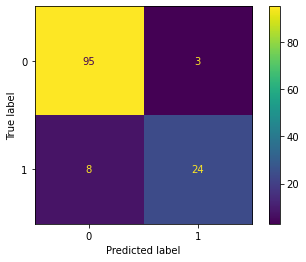

In [50]:
# Plot a confusion matrix on the test data
plot_confusion_matrix(dt, X_test, y_test)

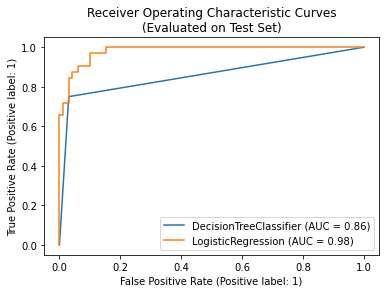

In [52]:
# Code to visualize the ROC curves for the models we've done
fig, ax = plt.subplots()
plot_roc_curve(dt, X_test, y_test, ax=ax)
plot_roc_curve(logreg, X_test_scaled, y_test, ax=ax)

plt.title("Receiver Operating Characteristic Curves\n(Evaluated on Test Set)")
plt.show()

### 15) Which is the better model according to ROC-AUC score? How can you tell?

In [ ]:
# call_on_students(1)

#### Answer:

- Logistic regression is better based on the ROC AUC scores. 
- Score closer to 1 is better! 
- we didn't tune our decision tree so could try tuning and seeing maybe Decision tree model does better. Decision tree has a lot of tuning hyper parameters. 